## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal:

**Goal is to analyse the data based off the 538 article and see if it reachs a similar conclusion. We will be using pandas and visualization libraries to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

**Article:**

 [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)

**The Data**

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
import warnings

In [122]:
warnings.simplefilter('ignore')

Exploring fandango ratings

In [66]:
fandango = pd.read_csv('fandango_scrape.csv')

In [40]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [41]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [42]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Visualization the relationship between popularity of a film and its rating. Creating a scatterplot for the same**

<Axes: xlabel='RATING', ylabel='VOTES'>

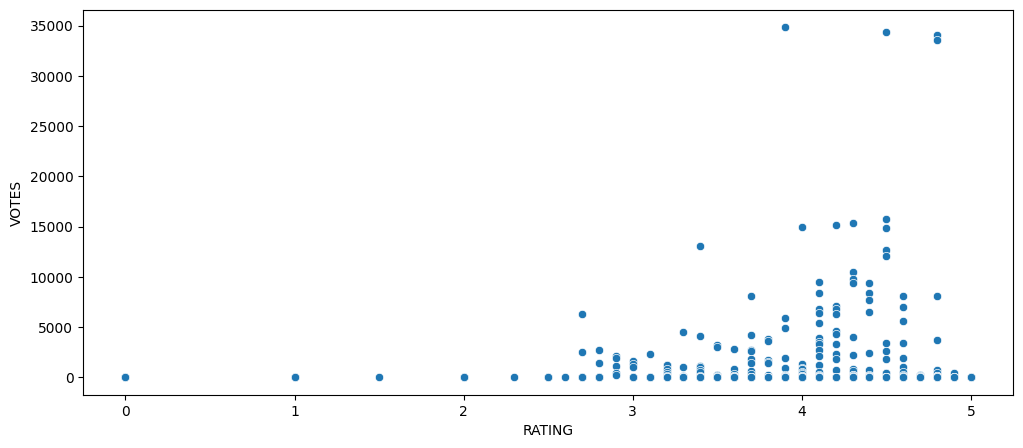

In [43]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

In [44]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Creating a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [70]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1])

In [83]:
fandango['YEAR'] = fandango['YEAR'].str.strip(')')


In [84]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**Number of movies on fandango per year**

In [85]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

**Visualizing the count of movies per year with a plot:**

<Axes: xlabel='YEAR', ylabel='count'>

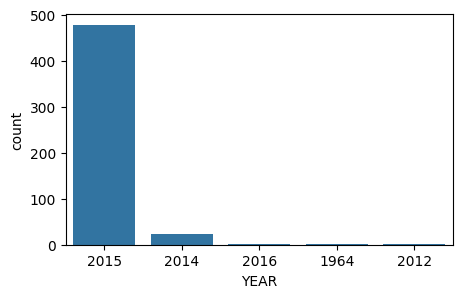

In [94]:
plt.figure(figsize=(5,3))
sns.countplot(data=fandango,x='YEAR')

**Top 10 Movies based on votes**

In [95]:
fandango.nlargest(n=10,columns='VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


Number of moives with zero votes

In [99]:
len(fandango[fandango['VOTES'] == 0])

69

**DataFrame only containing reviewed films**

In [100]:
reviewed = fandango[fandango['VOTES'] > 0]

----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user.**

**Creating  KDE plots (that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING).**

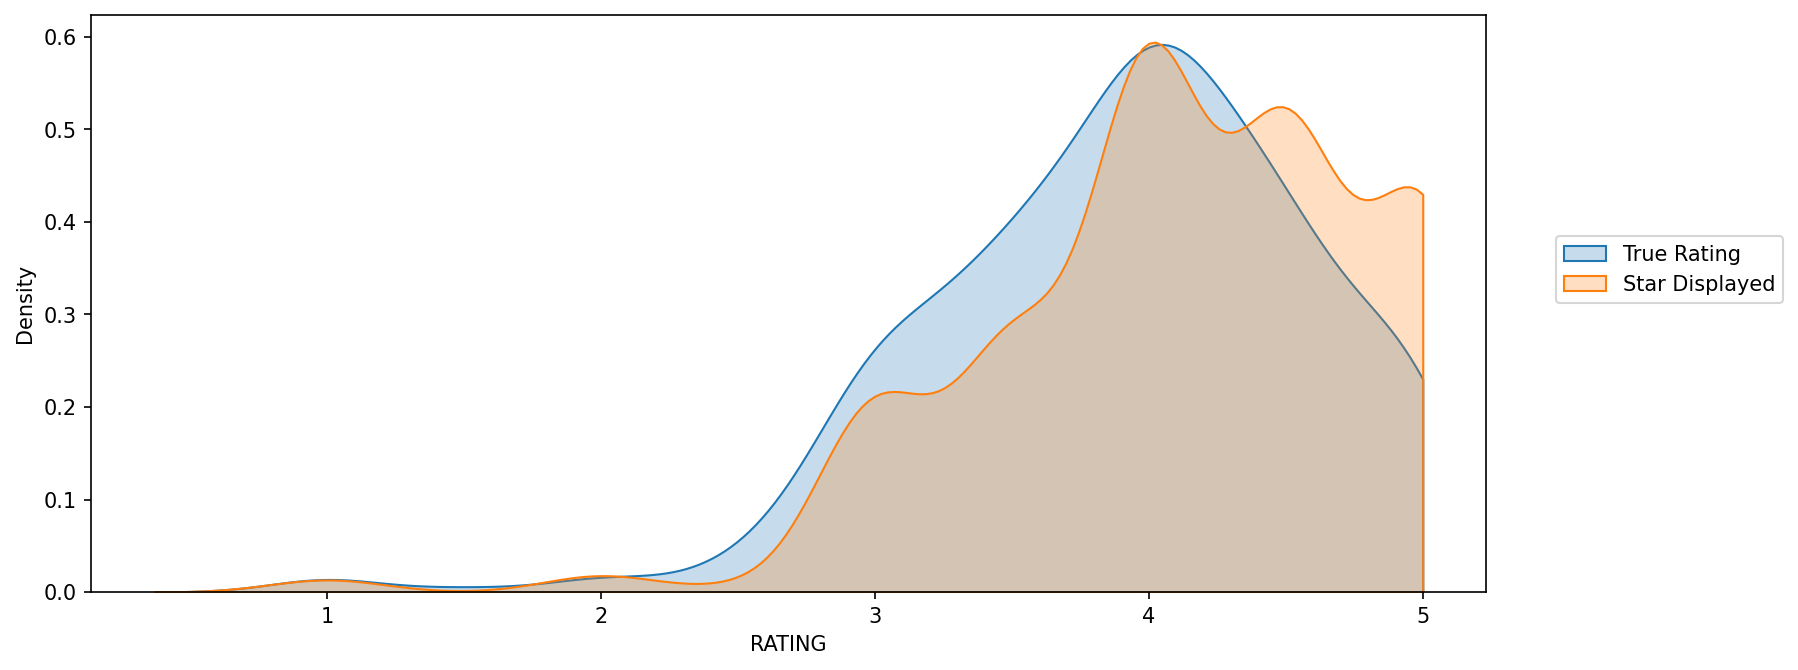

In [119]:
plt.figure(figsize=(12,5),dpi=150)
sns.kdeplot(data=reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=reviewed,x='STARS',clip=[0,5],fill=True,label='Star Displayed')
plt.legend(loc=(1.05,0.5))

**Difference between stars and ture rating**

In [123]:
reviewed['STAR_DIFF'] = reviewed['STARS'] - reviewed['RATING']

In [138]:
reviewed['STAR_DIFF'].round(2)

0      0.1
1      0.0
2      0.2
3      0.2
4      0.0
      ... 
430    0.0
431    0.0
432    0.0
433    0.0
434    0.0
Name: STAR_DIFF, Length: 435, dtype: float64

**Creating a count plot to display the number of times a certain difference occurs:**

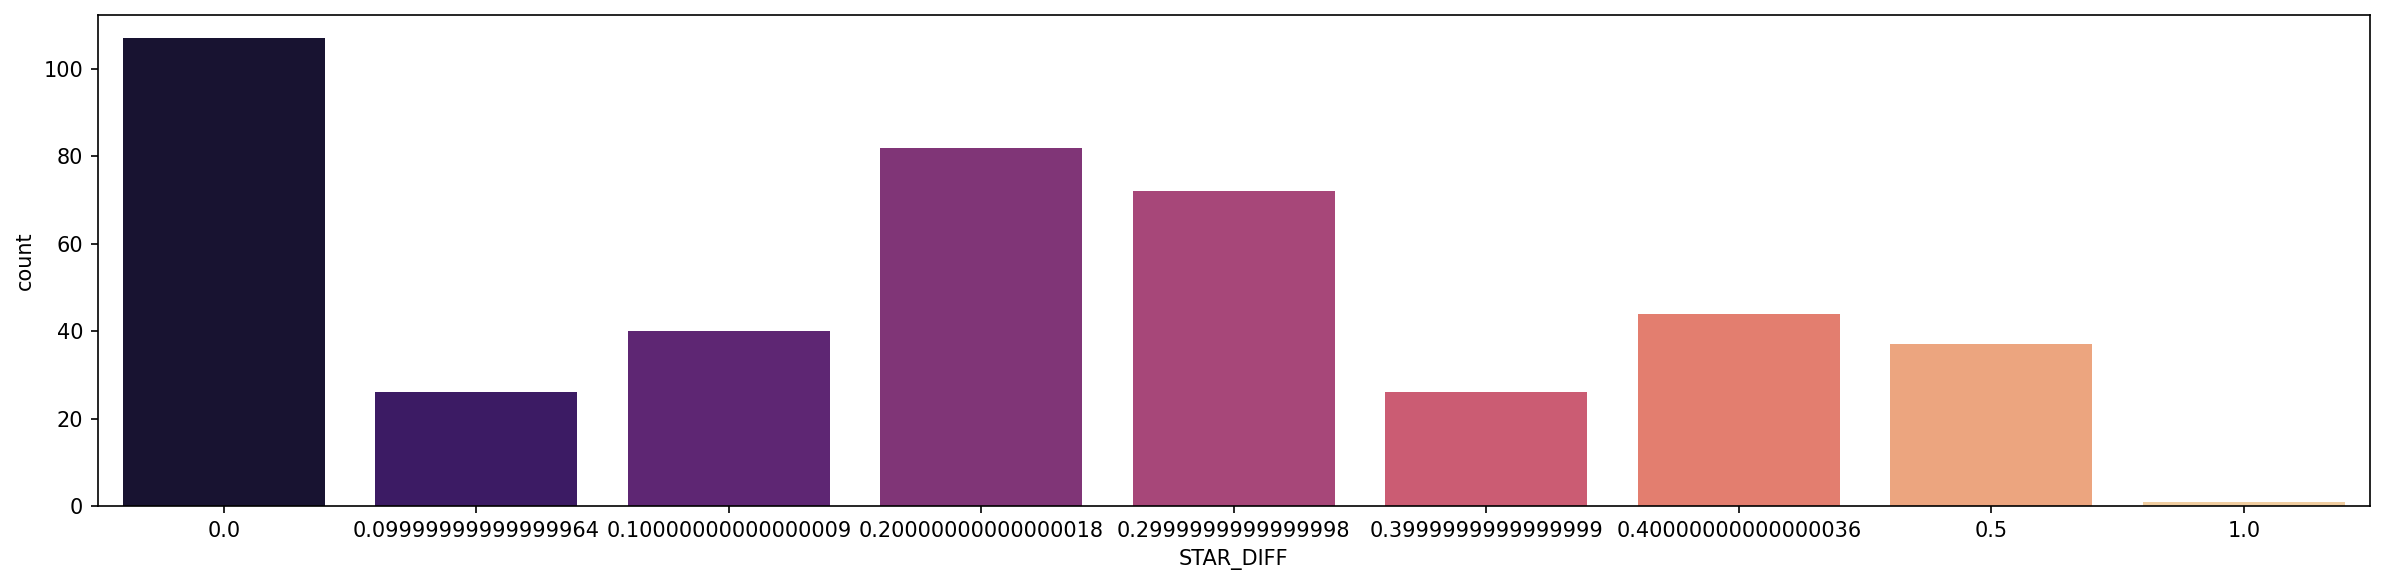

In [145]:
plt.figure(figsize=(16,4),dpi=150)
sns.countplot(data=reviewed,x='STAR_DIFF',palette='magma')
plt.tight_layout()

In [147]:
reviewed[reviewed['STAR_DIFF'] == 1.0]

,FILM,STARS,RATING,VOTES,YEAR,STAR_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0
